<a href="https://colab.research.google.com/github/mealvord/CompPhys_NumericalAnalysis/blob/main/Another_copy_of_muon_tracks_CC2_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Muon Tracks in CMS  

Write code to expand the pseudocode below into an investigation of [muon track data](https://github.com/QuarkNet-HEP/coding-camp/tree/main/data) in the CMS detector using [Holmes' model-fitting technique](https://docs.google.com/document/d/1VP2fAFiVm1FqjqD4D-jRctjdIrMiSmBWAYw_cqBhxV0/edit?usp=sharing) and the [PPDAC](https://docs.google.com/document/d/1ei4PwZsl9aN9HnxFz7CxEtViHXxPwyd0OAogSLCrm8U/edit?usp=sharing) framework.

## Pseudocode

In [ ]:
#import libraries for important stuff
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy as sp

In [ ]:
#Read data in
trackA = pd.read_csv('https://raw.githubusercontent.com/QuarkNet-HEP/coding-camp/main/data/muon_track_1.csv', skiprows=2)
trackB = pd.read_csv('https://raw.githubusercontent.com/QuarkNet-HEP/coding-camp/main/data/muon_track_2.csv', skiprows=2)
trackC = pd.read_csv('https://raw.githubusercontent.com/QuarkNet-HEP/coding-camp/main/data/muon_track_3.csv', skiprows=2)
trackD = pd.read_csv('https://raw.githubusercontent.com/QuarkNet-HEP/coding-camp/main/data/muon_track_4.csv', skiprows=2)

'''
#Below is alternate, clunky method to get data into form I want

# I'm using track 3
#this line drops the first two rows
track11 = track1.drop([0,1])
track21 = track2.drop([0,1])
track31 = track3.drop([0,1])
track41 = track4.drop([0,1])

#this line renames the columns to x and y
trackA = track11.rename(columns={"run: 178424,event: 666626491,lumi: 585,date_time: 2011-Oct-13 12:47:38.421105 GMT": "x", "Unnamed: 1": "y"})
trackB = track21.rename(columns={"run: 178424,event: 666626491,lumi: 585,date_time: 2011-Oct-13 12:47:38.421105 GMT": "x", "Unnamed: 1": "y"})
trackC = track31.rename(columns={"run: 178424,event: 666626491,lumi: 585,date_time: 2011-Oct-13 12:47:38.421105 GMT": "x", "Unnamed: 1": "y"})
trackD = track41.rename(columns={"run: 178424,event: 666626491,lumi: 585,date_time: 2011-Oct-13 12:47:38.421105 GMT": "x", "Unnamed: 1": "y"})
'''

#for some reason the data was reading as strings, so I changed the data type to float so that
#I could actualy do math and plots with the data
trackA = trackA.astype({'x':'float','y':'float'})
trackB = trackB.astype({'x':'float','y':'float'})
trackC = trackC.astype({'x':'float','y':'float'})
trackD = trackD.astype({'x':'float','y':'float'})

trackA.head()


,x,y
0,0.038726,-0.015958
1,0.131212,-0.055478
2,0.223866,-0.094564
3,0.316684,-0.133215
4,0.409664,-0.171429


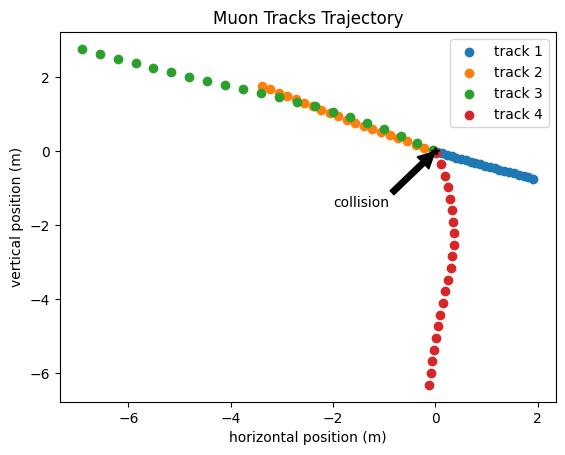

In [ ]:
plt.scatter(trackA['x'], trackA['y'], label='track 1')
plt.scatter(trackB['x'], trackB['y'], label='track 2')
plt.scatter(trackC['x'], trackC['y'], label='track 3')
plt.scatter(trackD['x'], trackD['y'], label='track 4')
plt.title('Muon Tracks Trajectory')
plt.xlabel('horizontal position (m)')
plt.ylabel('vertical position (m)')
plt.plot(0,0,'*',color='black')
plt.annotate('collision', xy=(0,0), xytext=(-2,-1.5),arrowprops=dict(facecolor='black', shrink=0.005))
plt.legend()
plt.show()

linear =  [-0.3862925  -0.01158637]
quadratic =  [ 0.01327689 -0.41220111 -0.00323752]
cubic =  [-0.01390885  0.05400041 -0.44389282  0.0018401 ]
quartic =  [-3.56495425e-03  1.12497577e-05  3.65519107e-02 -4.36354879e-01
  1.11601878e-03]
quintic =  [ 6.33345909e-03 -3.44796194e-02  5.36557438e-02 -2.70993713e-03
 -4.25415342e-01  4.08400646e-04]
linear fit ->  {'r_squared': 0.9995943276712614}
quad fit ->  {'r_squared': 0.9999074206409997}
cubic fit ->  {'r_squared': 0.9999971718742575}
quartic fit ->  {'r_squared': 0.9999985714454576}
quintic fit ->  {'r_squared': 0.9999997019101386}
other fit ->  {'r_squared': 0.9999999392426522}
other fit ->  {'r_squared': 0.9999999392426522}


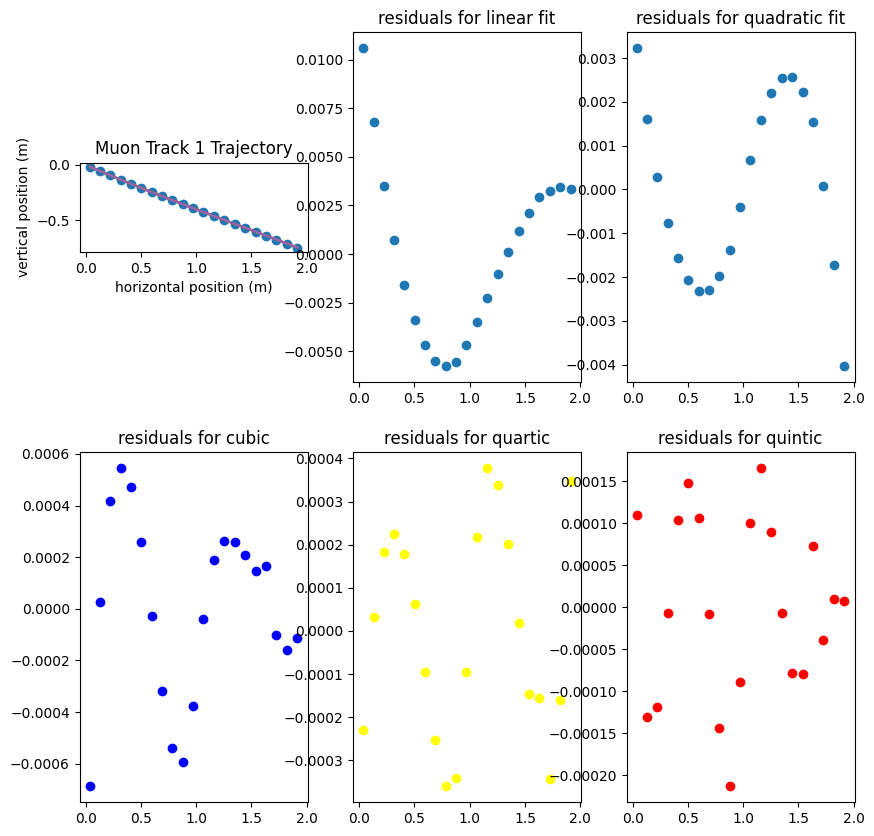

In [ ]:
# fit a linear model to a set of muon tracks in CMS

#renaming the variables for ease in later code
x = trackA['x']
y = trackA['y']

#make a figure
fig, ax = plt.subplots(2,3, figsize=(10,10))

#this is code that calculates the nth degree polynomial fit into a function called model#
model1 = np.poly1d(np.polyfit(x,y, deg=1))
model2 = np.poly1d(np.polyfit(x,y, deg=2))
model3 = np.poly1d(np.polyfit(x,y, deg=3))
model4 = np.poly1d(np.polyfit(x,y, deg=4))
model5 = np.poly1d(np.polyfit(x,y, deg=5))

#I printed these out so I can see the coefficients of the higher order polynomials
print('linear = ',np.polyfit(x,y, deg=1))
print('quadratic = ',np.polyfit(x,y, deg=2))
print('cubic = ',np.polyfit(x,y, deg=3))
print('quartic = ',np.polyfit(x,y, deg=4))
print('quintic = ',np.polyfit(x,y, deg=5))

#top left graph
ax[0,0].scatter(x,y)
ax[0,0].set(title='Muon Track 1 Trajectory', xlabel = 'horizontal position (m)',ylabel = 'vertical position (m)')
ax[0,0].plot(x,model1(x))
ax[0,0].plot(x,model2(x))
ax[0,0].plot(x,model3(x))
ax[0,0].plot(x,model4(x))
ax[0,0].plot(x,model5(x))
ax[0,0].set_aspect('equal')

#middle top graph
ax[0,1].set(title = 'residuals for linear fit')
ax[0,1].scatter(x,y-model1(x))

#right top graph
ax[0,2].set(title = 'residuals for quadratic fit')
ax[0,2].scatter(x,y-model2(x))

#bottom left graph
ax[1,0].scatter(x,y-model3(x), color = 'blue', label='cubic')
ax[1,0].set(title='residuals for cubic')
#bottom middle graph
ax[1,1].scatter(x,y-model4(x), color = 'yellow', label='quartic')
ax[1,1].set(title='residuals for quartic')
#bottom right graph
ax[1,2].scatter(x,y-model5(x), color = 'red', label='quintic')
ax[1,2].set(title='residuals for quintic')


#I copied this code from: https://www.statology.org/curve-fitting-python/

#define function to calculate adjusted r-squared
def adjR(x, y, degree):
    results = {}
    coeffs = np.polyfit(x, y, degree)
    p = np.poly1d(coeffs)
    yhat = p(x)
    ybar = np.sum(y)/len(y)
    ssreg = np.sum((yhat-ybar)**2)
    sstot = np.sum((y - ybar)**2)
    results['r_squared'] = 1- (((1-(ssreg/sstot))*(len(y)-1))/(len(y)-degree-1))

    return results

#print out of the adjusted r^2 values
print("linear fit -> ",adjR(x, y, 1))
print("quad fit -> ",adjR(x, y, 2))
print("cubic fit -> ",adjR(x, y, 3))
print("quartic fit -> ",adjR(x, y, 4))
print("quintic fit -> ",adjR(x, y, 5))
print("other fit -> ",adjR(x, y, 10))
print("other fit -> ",adjR(x, y, 10))

linear =  [-0.52376627 -0.03211606]
quadratic =  [ 0.01510221 -0.47178063 -0.00291913]
cubic =  [ 0.00311956  0.03120386 -0.44985012  0.00302353]
quartic =  [-0.0026752  -0.01528561 -0.00923456 -0.48004808 -0.00168111]
quintic =  [ 0.00165659  0.01156957  0.02808872  0.04601738 -0.45383277  0.0009308 ]
linear fit ->  {'r_squared': 0.999236820506136}
quad fit ->  {'r_squared': 0.9999526675493502}
cubic fit ->  {'r_squared': 0.9999767264916285}
quartic fit ->  {'r_squared': 0.9999911954517804}
quintic fit ->  {'r_squared': 0.9999954276680102}
other fit ->  {'r_squared': 0.9999997040009176}
other fit ->  {'r_squared': 0.9999997040009176}


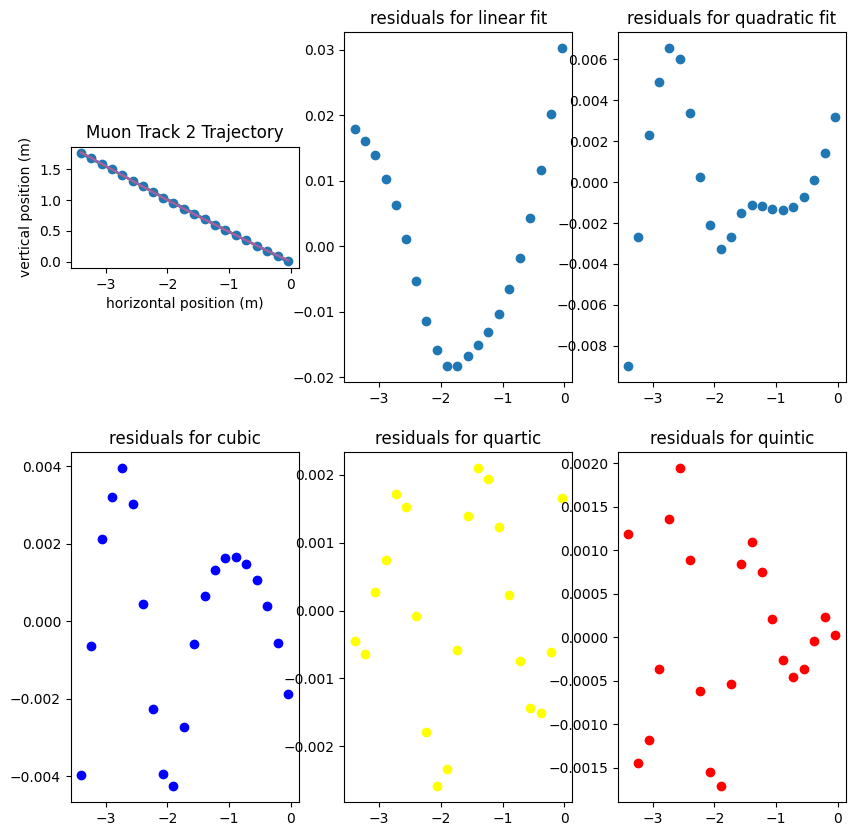

In [ ]:
# fit a linear model to a set of muon tracks in CMS

#renaming the variables for ease in later code
x = trackB['x']
y = trackB['y']

#make a figure
fig, ax = plt.subplots(2,3, figsize=(10,10))

#this is code that calculates the nth degree polynomial fit into a function called model#
model1 = np.poly1d(np.polyfit(x,y, deg=1))
model2 = np.poly1d(np.polyfit(x,y, deg=2))
model3 = np.poly1d(np.polyfit(x,y, deg=3))
model4 = np.poly1d(np.polyfit(x,y, deg=4))
model5 = np.poly1d(np.polyfit(x,y, deg=5))

#I printed these out so I can see the coefficients of the higher order polynomials
print('linear = ',np.polyfit(x,y, deg=1))
print('quadratic = ',np.polyfit(x,y, deg=2))
print('cubic = ',np.polyfit(x,y, deg=3))
print('quartic = ',np.polyfit(x,y, deg=4))
print('quintic = ',np.polyfit(x,y, deg=5))

#top left graph
ax[0,0].scatter(x,y)
ax[0,0].set(title='Muon Track 2 Trajectory', xlabel = 'horizontal position (m)',ylabel = 'vertical position (m)')
ax[0,0].plot(x,model1(x))
ax[0,0].plot(x,model2(x))
ax[0,0].plot(x,model3(x))
ax[0,0].plot(x,model4(x))
ax[0,0].plot(x,model5(x))
ax[0,0].set_aspect('equal')

#middle top graph
ax[0,1].set(title = 'residuals for linear fit')
ax[0,1].scatter(x,y-model1(x))

#right top graph
ax[0,2].set(title = 'residuals for quadratic fit')
ax[0,2].scatter(x,y-model2(x))

#bottom left graph
ax[1,0].scatter(x,y-model3(x), color = 'blue', label='cubic')
ax[1,0].set(title='residuals for cubic')
#bottom middle graph
ax[1,1].scatter(x,y-model4(x), color = 'yellow', label='quartic')
ax[1,1].set(title='residuals for quartic')
#bottom right graph
ax[1,2].scatter(x,y-model5(x), color = 'red', label='quintic')
ax[1,2].set(title='residuals for quintic')


#I copied this code from: https://www.statology.org/curve-fitting-python/

#define function to calculate adjusted r-squared
def adjR(x, y, degree):
    results = {}
    coeffs = np.polyfit(x, y, degree)
    p = np.poly1d(coeffs)
    yhat = p(x)
    ybar = np.sum(y)/len(y)
    ssreg = np.sum((yhat-ybar)**2)
    sstot = np.sum((y - ybar)**2)
    results['r_squared'] = 1- (((1-(ssreg/sstot))*(len(y)-1))/(len(y)-degree-1))

    return results

#print out of the adjusted r^2 values
print("linear fit -> ",adjR(x, y, 1))
print("quad fit -> ",adjR(x, y, 2))
print("cubic fit -> ",adjR(x, y, 3))
print("quartic fit -> ",adjR(x, y, 4))
print("quintic fit -> ",adjR(x, y, 5))
print("other fit -> ",adjR(x, y, 10))
print("other fit -> ",adjR(x, y, 10))

linear =  [-0.37676745  0.2171651 ]
quadratic =  [-0.01671888 -0.49229282  0.09090456]
cubic =  [-0.00641188 -0.08332587 -0.67307845 -0.00308467]
quartic =  [-2.70409268e-04 -1.01598477e-02 -9.98204005e-02 -6.97410871e-01
 -1.01756695e-02]
quintic =  [ 2.64138709e-04  4.30774943e-03  1.78261947e-02 -2.88089406e-02
 -6.31569527e-01  1.59930928e-03]
linear fit ->  {'r_squared': 0.9896132607643497}
quad fit ->  {'r_squared': 0.9963808205543757}
cubic fit ->  {'r_squared': 0.9999052381223372}
quartic fit ->  {'r_squared': 0.9999217045229738}
quintic fit ->  {'r_squared': 0.9999869713069014}
other fit ->  {'r_squared': 0.9999993758754784}
other fit ->  {'r_squared': 0.9999993758754784}


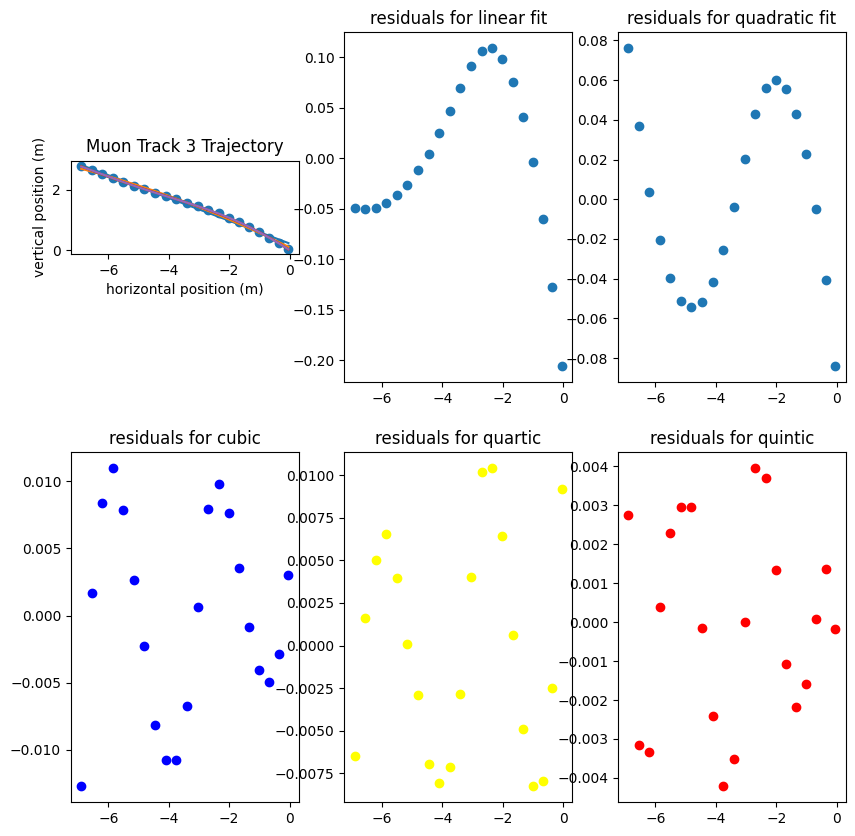

In [ ]:
# fit a linear model to a set of muon tracks in CMS

#renaming the variables for ease in later code
x = trackC['x']
y = trackC['y']

#make a figure
fig, ax = plt.subplots(2,3, figsize=(10,10))

#this is code that calculates the nth degree polynomial fit into a function called model#
model1 = np.poly1d(np.polyfit(x,y, deg=1))
model2 = np.poly1d(np.polyfit(x,y, deg=2))
model3 = np.poly1d(np.polyfit(x,y, deg=3))
model4 = np.poly1d(np.polyfit(x,y, deg=4))
model5 = np.poly1d(np.polyfit(x,y, deg=5))

#I printed these out so I can see the coefficients of the higher order polynomials
print('linear = ',np.polyfit(x,y, deg=1))
print('quadratic = ',np.polyfit(x,y, deg=2))
print('cubic = ',np.polyfit(x,y, deg=3))
print('quartic = ',np.polyfit(x,y, deg=4))
print('quintic = ',np.polyfit(x,y, deg=5))

#top left graph
ax[0,0].scatter(x,y)
ax[0,0].set(title='Muon Track 3 Trajectory', xlabel = 'horizontal position (m)',ylabel = 'vertical position (m)')
ax[0,0].plot(x,model1(x))
ax[0,0].plot(x,model2(x))
ax[0,0].plot(x,model3(x))
ax[0,0].plot(x,model4(x))
ax[0,0].plot(x,model5(x))
ax[0,0].set_aspect('equal')

#middle top graph
ax[0,1].set(title = 'residuals for linear fit')
ax[0,1].scatter(x,y-model1(x))

#right top graph
ax[0,2].set(title = 'residuals for quadratic fit')
ax[0,2].scatter(x,y-model2(x))

#bottom left graph
ax[1,0].scatter(x,y-model3(x), color = 'blue', label='cubic')
ax[1,0].set(title='residuals for cubic')
#bottom middle graph
ax[1,1].scatter(x,y-model4(x), color = 'yellow', label='quartic')
ax[1,1].set(title='residuals for quartic')
#bottom right graph
ax[1,2].scatter(x,y-model5(x), color = 'red', label='quintic')
ax[1,2].set(title='residuals for quintic')


#I copied this code from: https://www.statology.org/curve-fitting-python/

#define function to calculate adjusted r-squared
def adjR(x, y, degree):
    results = {}
    coeffs = np.polyfit(x, y, degree)
    p = np.poly1d(coeffs)
    yhat = p(x)
    ybar = np.sum(y)/len(y)
    ssreg = np.sum((yhat-ybar)**2)
    sstot = np.sum((y - ybar)**2)
    results['r_squared'] = 1- (((1-(ssreg/sstot))*(len(y)-1))/(len(y)-degree-1))

    return results

#print out of the adjusted r^2 values
print("linear fit -> ",adjR(x, y, 1))
print("quad fit -> ",adjR(x, y, 2))
print("cubic fit -> ",adjR(x, y, 3))
print("quartic fit -> ",adjR(x, y, 4))
print("quintic fit -> ",adjR(x, y, 5))
print("other fit -> ",adjR(x, y, 10))
print("other fit -> ",adjR(x, y, 10))

linear =  [ 7.4078444 -4.3514621]
quadratic =  [-29.04041216  15.43425006  -4.17583692]
cubic =  [ 58.5349526  -51.75004864  15.96857752  -3.9905591 ]
quartic =  [ 54.94232981  30.74740378 -49.57378653  16.31449229  -4.00598741]
quintic =  [-4.22135890e+03  2.71608321e+03 -3.42416578e+02 -7.86466509e+01
  2.13615968e+01 -3.96334599e+00]
linear fit ->  {'r_squared': 0.34223718143063764}
quad fit ->  {'r_squared': 0.406026403748891}
cubic fit ->  {'r_squared': 0.377654765276763}
quartic fit ->  {'r_squared': 0.33884579297719175}
quintic fit ->  {'r_squared': 0.30287369268818387}
other fit ->  {'r_squared': -0.01216132765234823}
other fit ->  {'r_squared': -0.01216132765234823}


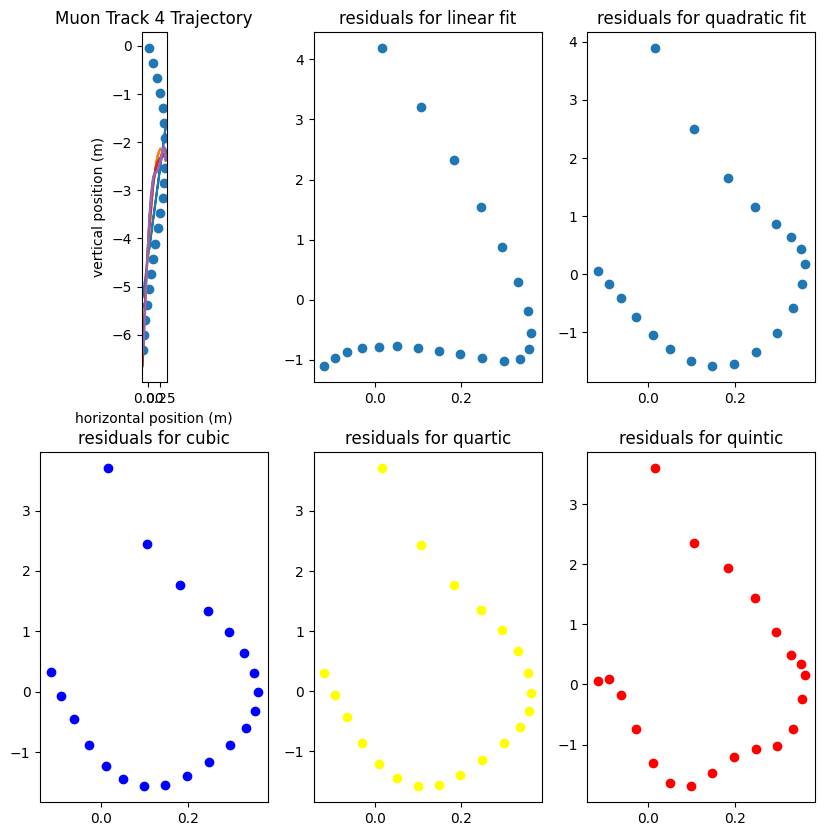

In [ ]:
# fit a linear model to a set of muon tracks in CMS

#renaming the variables for ease in later code
x = trackD['x']
y = trackD['y']

#make a figure
fig, ax = plt.subplots(2,3, figsize=(10,10))

#this is code that calculates the nth degree polynomial fit into a function called model#
model1 = np.poly1d(np.polyfit(x,y, deg=1))
model2 = np.poly1d(np.polyfit(x,y, deg=2))
model3 = np.poly1d(np.polyfit(x,y, deg=3))
model4 = np.poly1d(np.polyfit(x,y, deg=4))
model5 = np.poly1d(np.polyfit(x,y, deg=5))

#I printed these out so I can see the coefficients of the higher order polynomials
print('linear = ',np.polyfit(x,y, deg=1))
print('quadratic = ',np.polyfit(x,y, deg=2))
print('cubic = ',np.polyfit(x,y, deg=3))
print('quartic = ',np.polyfit(x,y, deg=4))
print('quintic = ',np.polyfit(x,y, deg=5))

#top left graph
ax[0,0].scatter(x,y)
ax[0,0].set(title='Muon Track 4 Trajectory', xlabel = 'horizontal position (m)',ylabel = 'vertical position (m)')
ax[0,0].plot(x,model1(x))
ax[0,0].plot(x,model2(x))
ax[0,0].plot(x,model3(x))
ax[0,0].plot(x,model4(x))
ax[0,0].plot(x,model5(x))
ax[0,0].set_aspect('equal')

#middle top graph
ax[0,1].set(title = 'residuals for linear fit')
ax[0,1].scatter(x,y-model1(x))

#right top graph
ax[0,2].set(title = 'residuals for quadratic fit')
ax[0,2].scatter(x,y-model2(x))

#bottom left graph
ax[1,0].scatter(x,y-model3(x), color = 'blue', label='cubic')
ax[1,0].set(title='residuals for cubic')
#bottom middle graph
ax[1,1].scatter(x,y-model4(x), color = 'yellow', label='quartic')
ax[1,1].set(title='residuals for quartic')
#bottom right graph
ax[1,2].scatter(x,y-model5(x), color = 'red', label='quintic')
ax[1,2].set(title='residuals for quintic')


#I copied this code from: https://www.statology.org/curve-fitting-python/

#define function to calculate adjusted r-squared
def adjR(x, y, degree):
    results = {}
    coeffs = np.polyfit(x, y, degree)
    p = np.poly1d(coeffs)
    yhat = p(x)
    ybar = np.sum(y)/len(y)
    ssreg = np.sum((yhat-ybar)**2)
    sstot = np.sum((y - ybar)**2)
    results['r_squared'] = 1- (((1-(ssreg/sstot))*(len(y)-1))/(len(y)-degree-1))

    return results

#print out of the adjusted r^2 values
print("linear fit -> ",adjR(x, y, 1))
print("quad fit -> ",adjR(x, y, 2))
print("cubic fit -> ",adjR(x, y, 3))
print("quartic fit -> ",adjR(x, y, 4))
print("quintic fit -> ",adjR(x, y, 5))
print("other fit -> ",adjR(x, y, 10))
print("other fit -> ",adjR(x, y, 10))

In [ ]:
#I copied this code from: https://www.statology.org/curve-fitting-python/

#define function to calculate adjusted r-squared
def adjR(x, y, degree):
    results = {}
    coeffs = np.polyfit(x, y, degree)
    p = np.poly1d(coeffs)
    yhat = p(x)
    ybar = np.sum(y)/len(y)
    ssreg = np.sum((yhat-ybar)**2)
    sstot = np.sum((y - ybar)**2)
    results['r_squared'] = 1- (((1-(ssreg/sstot))*(len(y)-1))/(len(y)-degree-1))

    return results

#print out of the adjusted r^2 values
print("linear fit -> ",adjR(x, y, 1))
print("quad fit -> ",adjR(x, y, 2))
print("cubic fit -> ",adjR(x, y, 3))
print("quartic fit -> ",adjR(x, y, 4))
print("quintic fit -> ",adjR(x, y, 5))
print("other fit -> ",adjR(x, y, 10))
print("other fit -> ",adjR(x, y, 10))

linear fit ->  {'r_squared': 0.9995943276712614}
quad fit ->  {'r_squared': 0.9999074206409997}
cubic fit ->  {'r_squared': 0.9999971718742575}
quartic fit ->  {'r_squared': 0.9999985714454576}
quintic fit ->  {'r_squared': 0.9999997019101386}
other fit ->  {'r_squared': 0.9999999392426522}
other fit ->  {'r_squared': 0.9999999392426522}


In [ ]:
# compare the two models using chi-sq or residual sum of squares (RSS)

#I chose RSS
rs1 = sum((y-r(x))**2)
rs2 = sum((y-p(x))**2)
rs3 = sum((y-model3(x))**2)
rs4 = sum((y-model4(x))**2)
rs5 = sum((y-model5(x))**2)

print('RSS 1 = ',rs1)
print('RSS 2 = ',rs2)
print('RSS 3 = ',rs3)
print('RSS 4 = ',rs4)
print('RSS 5 = ',rs5)


NameError: name 'r' is not defined

In [ ]:
# perform analysis in both a spreadsheet and a Jupyter notebook

In [ ]:
# present using PPDAC framework